In [1]:
import importlib
import os
import sys
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as md

from dotenv import load_dotenv

In [2]:
# Makes sure modules are available to the notebook that acts as an entrypoint

load_dotenv()

parent_dir = os.path.abspath('..')

if parent_dir not in sys.path:
    sys.path.append(parent_dir)

In [3]:
# Manually reloading python module such that jupyter reflects changes without kernel restart

import plutus.code.calc.ma as ma

importlib.reload(ma);

In [4]:
from plutus.code.api_connector import ApiConnector

In [5]:
data_source = 'uds'

ticker = 'TSLA'
start_date = '2023-05-24-00:00'
end_date = '2023-05-25-00:00'
n_periods = 1

api_connector = ApiConnector(data_source)
api_connector.ticker = ticker
api_connector.start_date = start_date
api_connector.end_date = end_date
api_connector.n_periods = n_periods

df = api_connector.request_daily_prices()

In [6]:
"""
We first calculate simple and exponential moving averages

And then calculate crossover points, from which we deduce buy or sell signals
"""

moving_average = 'ema'

ma_intervals = [14, 21]

ma_calculator = ma.MovingAverageCalculator()

ma_calculator.dataframe = df
ma_calculator.ma = moving_average
ma_calculator.intervals = ma_intervals

ma_calculator.calculate_moving_average()

ma_calculator.calculate_crossovers()

df

TypeError: list indices must be integers or slices, not str

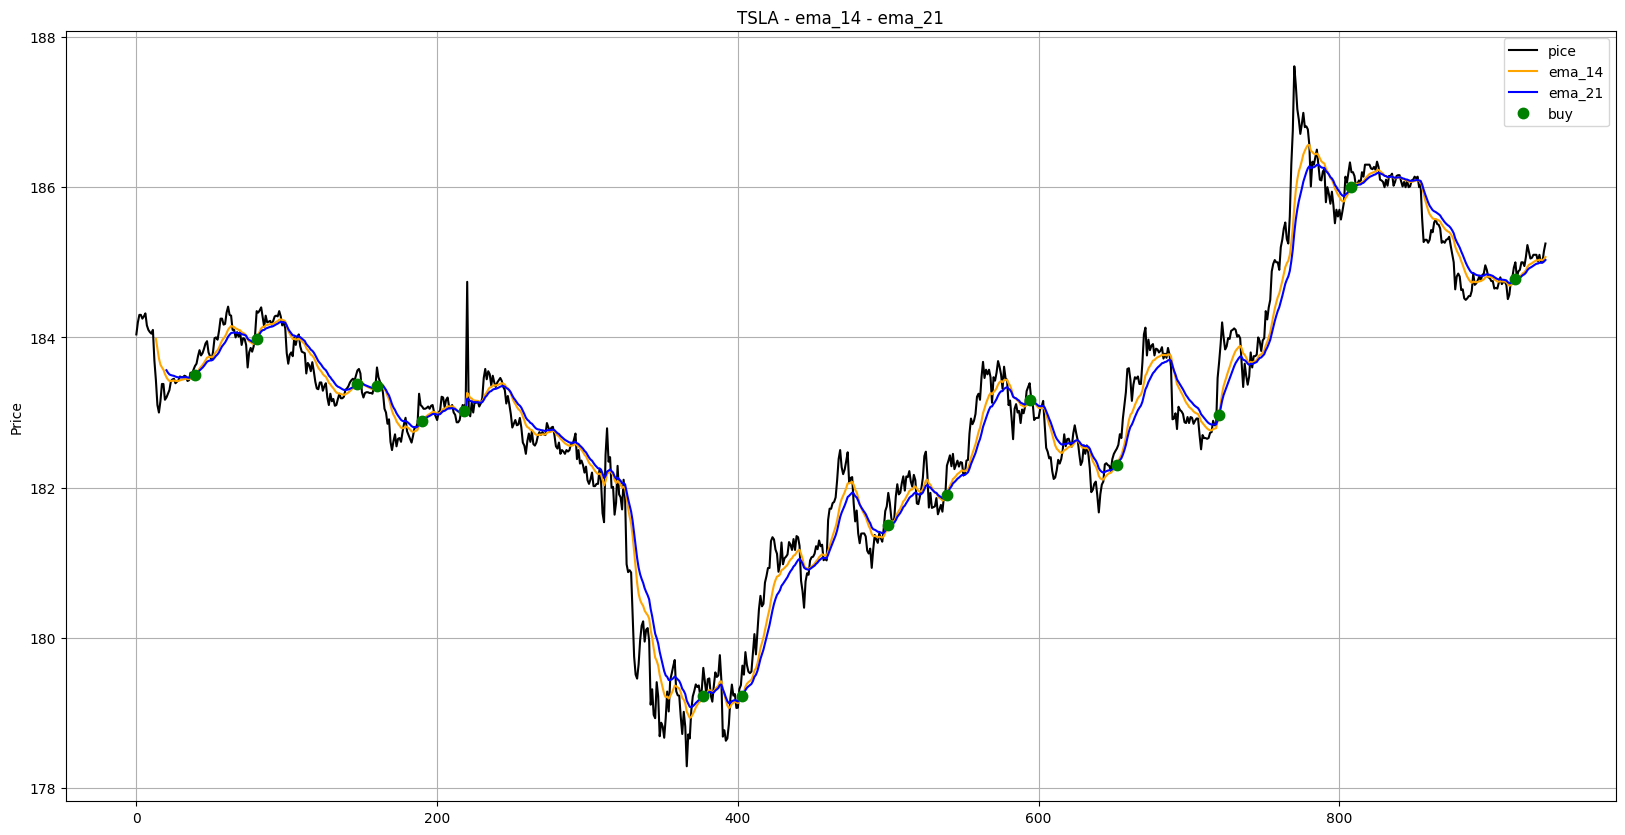

In [ ]:
shorter_ema_column = f"{moving_average}_{ma_intervals[0]}"

longer_ema_column = f"{moving_average}_{ma_intervals[1]}"

ema_crossover_position = f"{moving_average}_{ma_intervals[0]}_{ma_intervals[1]}_position"

fig, ax = plt.subplots(figsize=(20, 10))

# Plot prices and averages
plt.plot(df['close'], color='black', label='pice')

plt.plot(df[shorter_ema_column], color='orange', label=shorter_ema_column)

plt.plot(df[longer_ema_column], color='blue', label=longer_ema_column)

# Plot bullish crossovers
plt.plot(
    df[df[ema_crossover_position] == 1].index,
    df[longer_ema_column][df[ema_crossover_position] == 1],
    '.',
    markersize = 15, color = 'green', label = 'buy'
)

plt.ylabel('Price')

plt.title(f'{ticker} - {shorter_ema_column} - {longer_ema_column}')

plt.grid()

plt.legend()